# Sklearn course 11 : Ensemble Learning

**The widsdom of the crowd** : use multiple ML model and take the avarage response. Two ondition:
1. In average, each model has to perform higher than 50% -> the sum of the models will converge to 100%
2. There must be diversity among the models 

## Bagging :
Ex : `RandomForestClassifier`, `RandomForestRegressor`

![.](images/bagging.jpg)

## Boosting
Ex : `AdaBoostClassifier`, `AdaBoostRegressor`, `GradientBoostingClassifier`, `GradientBoostingRegressor`

![.](images/boosting.jpg)

## Stacking
Ex : `StackingClassifier`, `StackingRegressor`

![.](images/stacking.jpg)

## Standard import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

## Create Data

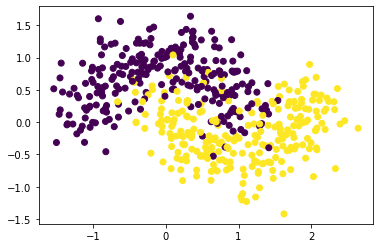

In [7]:
X, y = make_moons(n_samples=500, noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X[:,0], X[:,1], c=y)

## Voting classifier : 
model composing the crowd <br>
for classification probleme, the soft vote is better

<img src="images/voting.jpg" style="width: 400px;"/>

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [29]:
model_1 = SGDClassifier()
model_2 = DecisionTreeClassifier()
model_3 = KNeighborsClassifier()

models = {
    "SGD":model_1,
    "Tree":model_2,
    "KNN":model_3
}

for name, model in models.items():
    model.fit(X_train,y_train)
    print(name, model.score(X_test, y_test))

SGD 0.86
Tree 0.92
KNN 0.92


In [35]:
model_4 = VotingClassifier(list(models.items()),
                           voting="hard" ) # cant use soft here

model_4.fit(X_train,y_train)
"VotingClassifier", model_4.score(X_test, y_test)

('VotingClassifier', 0.94)

## Bagging

In [36]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.92

In [37]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.93

## Boosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [40]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

In [41]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.93

## Stacking

In [50]:
%%time 

from sklearn.ensemble import StackingClassifier

models["RandomForest"] = RandomForestClassifier()

model = StackingClassifier(list(models.items()),
                            final_estimator=KNeighborsClassifier())


model.fit(X_train, y_train)
model.score(X_test, y_test)

CPU times: user 764 ms, sys: 14.6 ms, total: 778 ms
Wall time: 785 ms


0.92